In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scattertext as st
from spacy import load
nlp = load('en_core_web_md')

df = pd.read_table('data/facemasks.tsv').drop_duplicates()
df.set_index('id', verify_integrity=True, inplace=True)
df.head()

2023-05-02 16:24:24.165171: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 16:24:24.939932: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-02 16:24:26.047128: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-02 16:24:26.047765: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

,abuseCount,customerNickname,helpfulNo,helpfulYes,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,...,reviewed,score,languageCode.1,translation.reviewText,translation.reviewTitle,product_name,material,n_masks,brand,product_price
id,,,,,,,,,,,,,,,,,,,,,
05c2b17e-c28d-4792-930d-27e787d8d4ad,0,iHerb Customer,0,6,1,en-US,2021-01-27T09:04:10.569Z,103839,0.0,34.0,...,True,1.614071e+09,en-US,NaN,NaN,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85
80e44af8-2edf-4b81-a80a-7e7888d03cc0,0,iHerb Customer,0,0,0,ru-RU,2021-02-07T00:56:39.055Z,103839,0.0,37.0,...,False,1.612659e+09,ru-RU,The grandson really liked it. Comfortable mask.,en-US,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85
9a76e047-21e4-4da3-8b50-9d2396519b6b,0,iHerb Customer,0,0,0,en-US,2021-02-06T21:40:02.886Z,103839,0.0,3.0,...,False,1.612648e+09,en-US,NaN,NaN,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85
2890ac54-8707-418e-be3e-8d46231e3672,0,InnaIgorevna,0,0,0,ru-RU,2021-02-05T16:29:28.906Z,103839,0.0,16.0,...,False,1.612543e+09,ru-RU,A thin mask that is pleasant to the body. I li...,en-US,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85
9db33354-0457-4efa-bc9c-b5f7ee0eff31,0,iHerb Customer,0,0,0,ru-RU,2021-02-05T09:43:42.367Z,103839,0.0,19.0,...,False,1.612518e+09,ru-RU,Great mask! It suited me perfectly. There is a...,en-US,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85


In [2]:
df['verdict'] = 'Bad'
df.loc[df['ratingValue'] >= 30, 'verdict'] = 'Good'

In [3]:
eng = df[df['languageCode'].str.startswith('en')]
eng['languageCode'].unique()

array(['en-US'], dtype=object)

In [4]:
eng = eng.copy()

In [5]:
eng['phrases'] = [list(doc.noun_chunks) for doc in nlp.pipe(eng['reviewText'].values)]

In [6]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

Text(0.5, 1.0, 'Nouns')

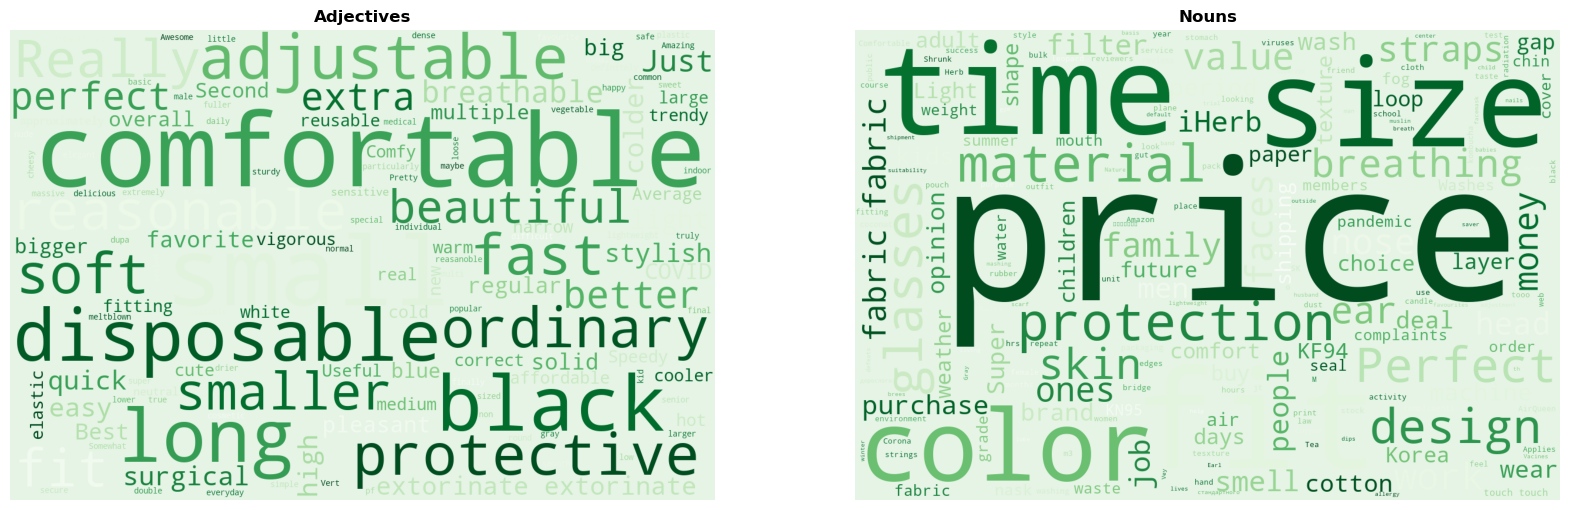

In [19]:
stop = ENGLISH_STOP_WORDS.union(
    {'mask', 'masks', 'good', 'great', 'nice', 'quality', 'product', 'excellent', 'face', 'delivery', 'exellent'}
)
to_drop = ['AUX', 'CCONJ', 'INTJ', 'NUM', 'PART', 'PRON', 'PUNCT', 'SCONJ', 'SPACE', 'SYM', 'X']

ADJ_TAGS = {'ADJ', 'ADP', 'ADV'}
NOUN_TAGS = {'NOUN', 'PROPN'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 24))
pos_wc = WordCloud(stopwords=stop, width=1200, height=800, background_color='#e6f4e6', colormap=plt.cm.Greens)
pos_text = []
for phrases in eng[eng['verdict'] == 'Good']['phrases'].values:
    for phrase in phrases:
        words = [w for w in phrase if w.pos_ not in to_drop]
    pos_text.extend(words)

pos_adj_text = [p for p in pos_text if p.pos_ in ADJ_TAGS]
ax[0].imshow(pos_wc.generate(' '.join([w.text for w in pos_adj_text])))


pos_noun_text = [p for p in pos_text if p.pos_ in NOUN_TAGS]
ax[1].imshow(pos_wc.generate(' '.join([w.text for w in pos_noun_text])))
[k.set_axis_off() for k in ax.ravel()]
ax[0].set_title('Adjectives', weight='bold')
ax[1].set_title('Nouns', weight='bold')

# plt.suptitle('Customers value Comfort and Quality')

Text(0.5, 1.0, 'Nouns')

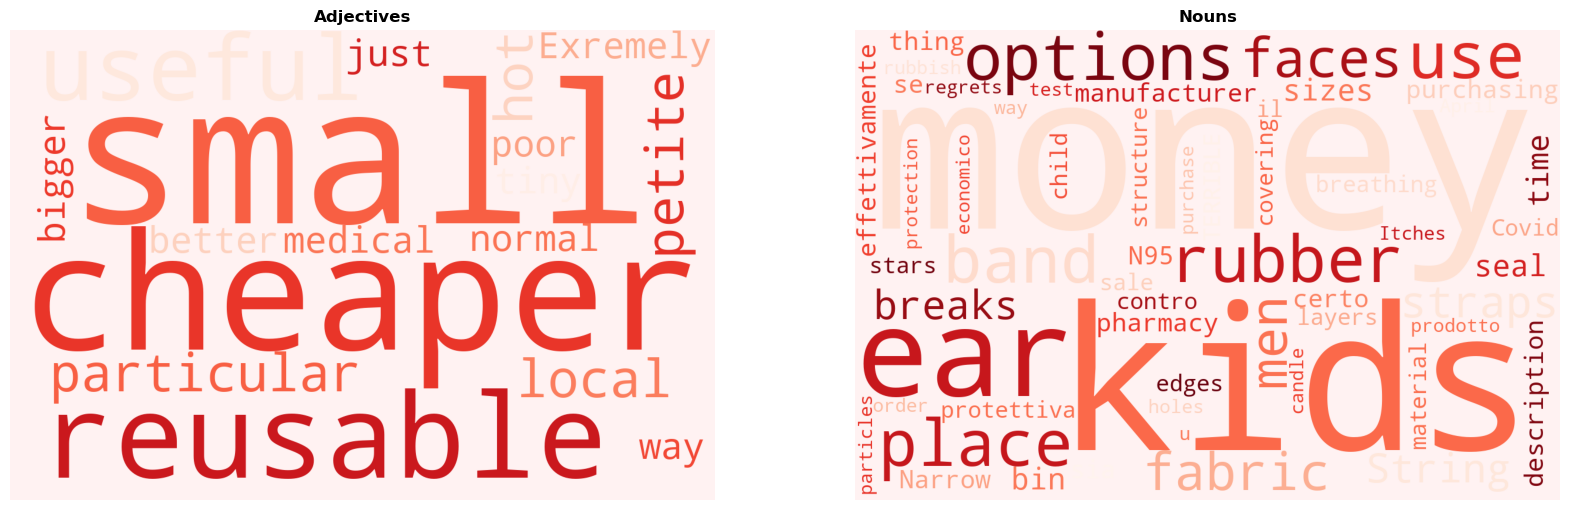

In [13]:
# stop = ENGLISH_STOP_WORDS.union({'mask', 'masks'})
to_drop = ['AUX', 'CCONJ', 'INTJ', 'NUM', 'PRON', 'PUNCT', 'SCONJ', 'SPACE', 'SYM', 'X']

ADJ_TAGS = {'ADJ', 'ADP', 'ADV'}
NOUN_TAGS = {'NOUN', 'PROPN'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 24))
neg_wc = WordCloud(stopwords=stop, width=1200, height=800, background_color='#fff2f2', colormap=plt.cm.Reds)
neg_text = []
for phrases in eng[eng['verdict'] == 'Bad']['phrases'].values:
    for phrase in phrases:
        words = [w for w in phrase if w.pos_ not in to_drop]
    neg_text.extend(words)

neg_adj_text = [p for p in neg_text if p.pos_ in ADJ_TAGS]
ax[0].imshow(neg_wc.generate(' '.join([w.text for w in neg_adj_text])))


neg_noun_text = [p for p in neg_text if p.pos_ in NOUN_TAGS]
ax[1].imshow(neg_wc.generate(' '.join([w.text for w in neg_noun_text])))
[k.set_axis_off() for k in ax.ravel()]
ax[0].set_title('Adjectives', weight='bold')
ax[1].set_title('Nouns', weight='bold')

# plt.suptitle('Customers value Comfort and Quality')

In [14]:
# Wordclouds for market leaders and disruptors
MARKET_LEADERS = ['Sunjoy', 'HIGUARD', 'Kitsch', 'Kosette']
DISRUPTORS = ['Lozperi', 'Hwipure']
df['brand_type'] = ''
df.loc[df['brand'].isin(MARKET_LEADERS), 'brand_type'] = 'Market Leaders'
df.loc[df['brand'].isin(DISRUPTORS), 'brand_type'] = 'Disruptors'


eng = df[df['languageCode'].str.startswith('en')].copy()
eng['phrases'] = [list(doc.noun_chunks) for doc in nlp.pipe(eng['reviewText'].values)]
eng_ml = eng[eng['brand_type'] == 'Market Leaders']
eng_d = eng[eng['brand_type'] == 'Disruptors']

In [20]:
df['brand_type'].unique()

array(['Disruptors', 'Market Leaders', ''], dtype=object)

Text(0.5, 1.0, 'Nouns')

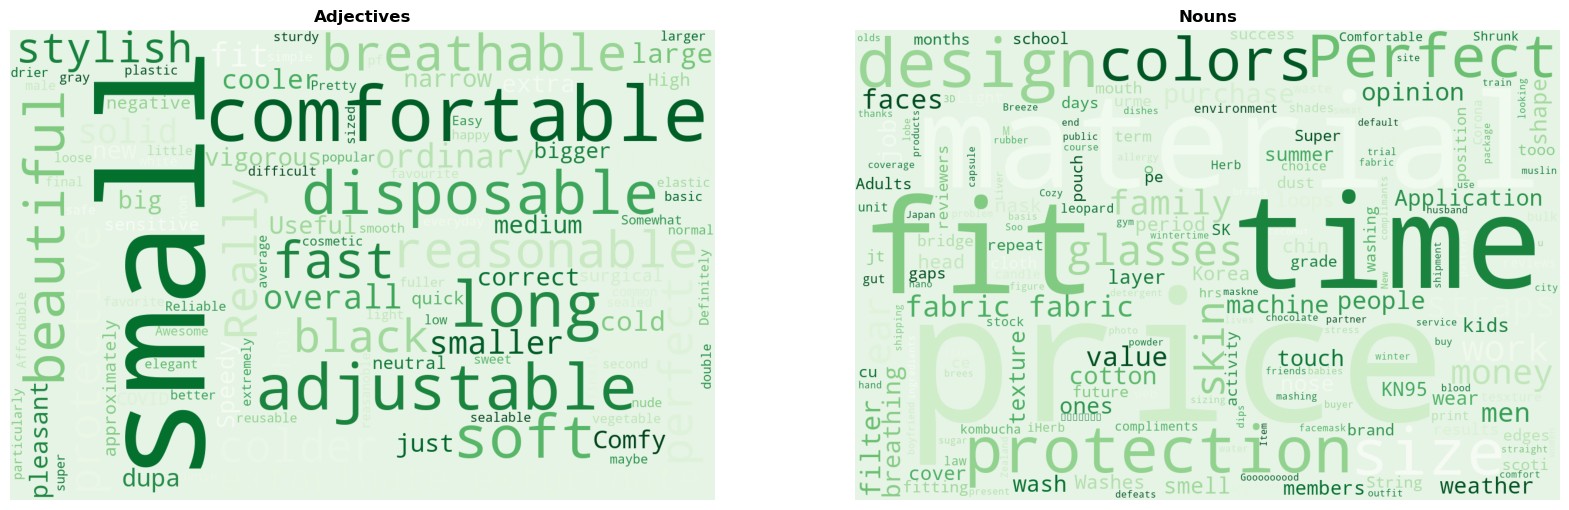

In [15]:
# stop = ENGLISH_STOP_WORDS.union({'mask', 'masks'})
to_drop = ['AUX', 'CCONJ', 'INTJ', 'NUM', 'PART', 'PRON', 'PUNCT', 'SCONJ', 'SPACE', 'SYM', 'X']

ADJ_TAGS = {'ADJ', 'ADP', 'ADV'}
NOUN_TAGS = {'NOUN', 'PROPN'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 24))
pos_wc = WordCloud(stopwords=stop, width=1200, height=800, background_color='#e6f4e6', colormap=plt.cm.Greens)
pos_text_ml = []
for phrases in eng_ml[eng_ml['verdict'] == 'Good']['phrases'].values:
    for phrase in phrases:
        words = [w for w in phrase if w.pos_ not in to_drop]
    pos_text_ml.extend(words)

pos_adj_text_ml = [p for p in pos_text_ml if p.pos_ in ADJ_TAGS]
ax[0].imshow(pos_wc.generate(' '.join([w.text for w in pos_adj_text_ml])))


pos_noun_text_ml = [p for p in pos_text_ml if p.pos_ in NOUN_TAGS]
ax[1].imshow(pos_wc.generate(' '.join([w.text for w in pos_noun_text_ml])))
[k.set_axis_off() for k in ax.ravel()]
ax[0].set_title('Adjectives', weight='bold')
ax[1].set_title('Nouns', weight='bold')

# plt.suptitle('Customers value Comfort and Quality')

Text(0.5, 1.0, 'Nouns')

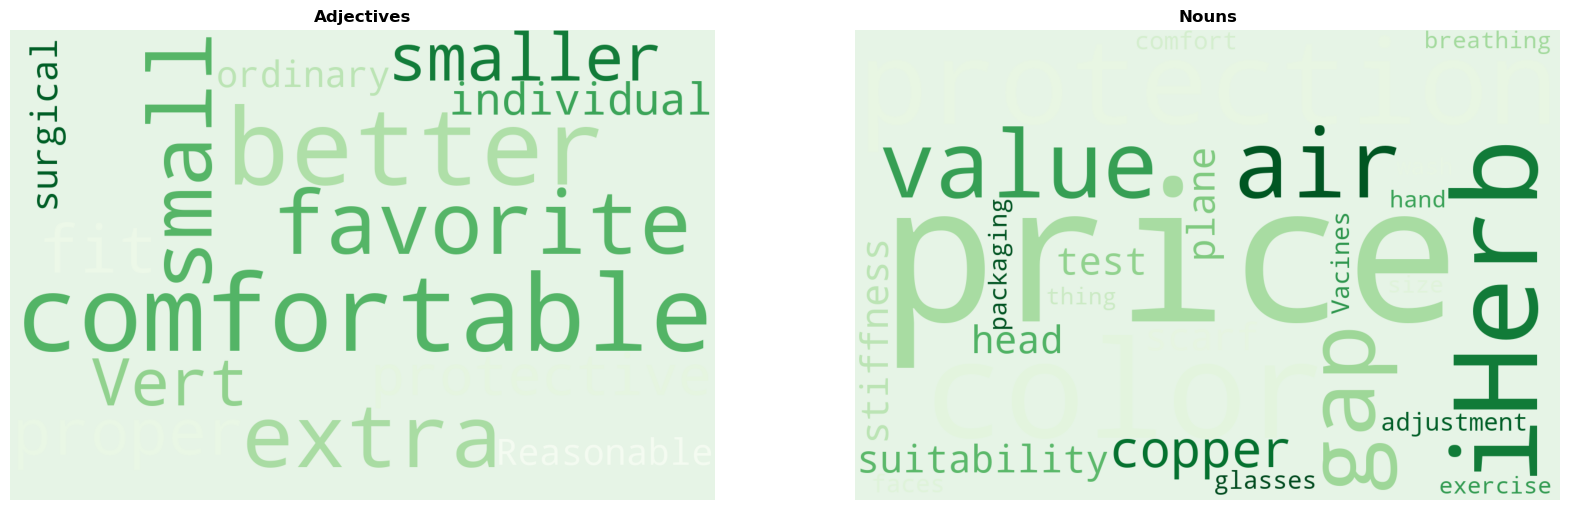

In [29]:
# stop = ENGLISH_STOP_WORDS.union({'mask', 'masks'})
stop = stop.union({'radiation'})
to_drop = ['AUX', 'CCONJ', 'INTJ', 'NUM', 'PART', 'PRON', 'PUNCT', 'SCONJ', 'SPACE', 'SYM', 'X']

ADJ_TAGS = {'ADJ', 'ADP', 'ADV'}
NOUN_TAGS = {'NOUN', 'PROPN'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 24))
pos_wc = WordCloud(stopwords=stop, width=1200, height=800, background_color='#e6f4e6', colormap=plt.cm.Greens)
pos_text = []
for phrases in eng_d[eng_d['verdict'] == 'Good']['phrases'].values:
    for phrase in phrases:
        words = [w for w in phrase if w.pos_ not in to_drop]
    pos_text.extend(words)

pos_adj_text = [p for p in pos_text if p.pos_ in ADJ_TAGS]
ax[0].imshow(pos_wc.generate(' '.join([w.text for w in pos_adj_text])))


pos_noun_text = [p for p in pos_text if p.pos_ in NOUN_TAGS]
ax[1].imshow(pos_wc.generate(' '.join([w.text for w in pos_noun_text])))
[k.set_axis_off() for k in ax.ravel()]
ax[0].set_title('Adjectives', weight='bold')
ax[1].set_title('Nouns', weight='bold')

# plt.suptitle('Customers value Comfort and Quality')

In [28]:
eng_d['reviewText']

id
05c2b17e-c28d-4792-930d-27e787d8d4ad    The mask quality and the color is good. It fit...
9a76e047-21e4-4da3-8b50-9d2396519b6b                Easy to put on & comfortable to wear.
5fab014c-d839-4743-a343-cf03b7b168ce    a little bigger for a small face..for me it is...
90e02dad-fcf3-4c40-b21c-6e7b12168ee6    The Copper fibers in the fabric not only offer...
72c1f16a-9c93-4b8a-961d-8ee4487c5c72                                      will buy again!
                                                              ...                        
7fa0b0cd-40fc-433e-806b-5388804a07a1    A bit too large for small face n u can smell t...
5f6db446-499f-4c31-9a58-4dce25749eaa                       comfortable and easy to breath
808a010c-36fd-4afd-8d37-fe5c35dd0cdb              Little hard to breath but it fits well!
fc21fe61-2486-4cd6-bb39-259fc261bf74                                  every thing is good
a28e0c08-29ab-4e5a-bb48-25943032b378    If you’re an adult with a small face this is g...
Name: r

Text(0.5, 1.0, 'Nouns')

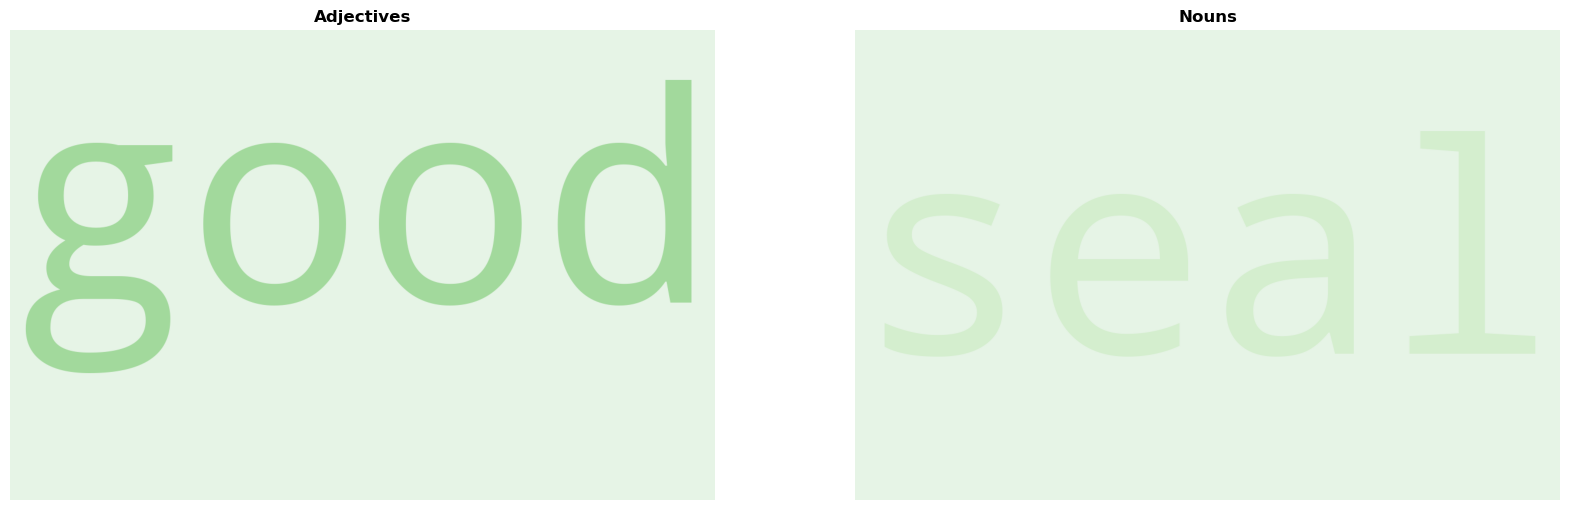

In [23]:
stop = ENGLISH_STOP_WORDS.union({'mask', 'masks'})
to_drop = ['AUX', 'CCONJ', 'INTJ', 'NUM', 'PART', 'PRON', 'PUNCT', 'SCONJ', 'SPACE', 'SYM', 'X']

ADJ_TAGS = {'ADJ', 'ADP', 'ADV'}
NOUN_TAGS = {'NOUN', 'PROPN'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 24))
pos_wc = WordCloud(stopwords=stop, width=1200, height=800, background_color='#e6f4e6', colormap=plt.cm.Greens)
pos_text = []
for phrases in eng_d[eng_d['verdict'] == 'Bad']['phrases'].values:
    for phrase in phrases:
        words = [w for w in phrase if w.pos_ not in to_drop]
    pos_text.extend(words)

pos_adj_text = [p for p in pos_text if p.pos_ in ADJ_TAGS]
ax[0].imshow(pos_wc.generate(' '.join([w.text for w in pos_adj_text])))


pos_noun_text = [p for p in pos_text if p.pos_ in NOUN_TAGS]
ax[1].imshow(pos_wc.generate(' '.join([w.text for w in pos_noun_text])))
[k.set_axis_off() for k in ax.ravel()]
ax[0].set_title('Adjectives', weight='bold')
ax[1].set_title('Nouns', weight='bold')

# plt.suptitle('Customers value Comfort and Quality')

In [31]:
eng[eng['brand_type'] == 'Disruptors']['ratingValue'].value_counts()

50    62
40    18
30     6
20     1
Name: ratingValue, dtype: int64

In [44]:
# Scattertext
eng['phrases2'] = eng['phrases'].apply(lambda x: nlp('. '.join([''.join(t.text) for t in x])))

In [45]:
corp = st.CorpusFromParsedDocuments(eng, 'verdict', 'phrases2').build()

In [58]:
html = st.produce_scattertext_explorer(corp, category='Good', category_name='Positive', not_category_name='Negative')

In [59]:
with open('assets/st.html', 'w') as fout:
    fout.write(html)